Import Packages

In [2]:
import sklearn
import pandas
import csv
import os
import numpy as np
print os.getcwd()

np.random.seed(42)

/Users/laurazhang/Documents/artificialecon/code


Read in Data

In [3]:
filename = "../datasets/phd_clustering.csv" # input
housing_df = pandas.read_csv(filename)

Prepare Datasets

In [14]:
# Drop missing values that are negative
housing_df[housing_df < 0] = np.nan

# Information on housing_df
print "All rows", len(housing_df)
print "All cols", len(housing_df.columns)

# Subset of rows for NY housing
df = housing_df.loc[housing_df['STD_ST'].isin(['NY','DC', 'MA', 'ND','CT'])]

# Information on ny_df
print "NY rows", len(df)
print "NY cols", len(df.columns)

# STD_ST = 'NY' for ny_df because all rows are for NY
del df['STD_ST']

All rows 6834
All cols 67
NY rows 804
NY cols 67


KMeans Initial Clustering

In [15]:
print pandas.DataFrame.max(df)

print "cols", len(df.columns)


BLKGRP_ID                     3.810595e+11
TOTAL_UNITS                   2.391000e+03
TOTAL_DWELLING_UNITS          2.391000e+03
ACC_UNITS                     2.391000e+03
TOTAL_OCCUPIED                2.377000e+03
REGULAR_VACANT                2.620000e+02
PHA_TOTAL_UNITS               1.746200e+05
PCT_OCCUPIED                  1.000000e+02
NUMBER_REPORTED               2.354000e+03
PCT_REPORTED                  1.000000e+02
MONTHS_SINCE_REPORT           5.900000e+01
PCT_MOVEIN                    1.000000e+02
PEOPLE_PER_UNIT               7.400000e+00
PEOPLE_TOTAL                  5.232000e+03
RENT_PER_MONTH                1.072000e+03
SPENDING_PER_MONTH            8.350000e+02
HH_INCOME                     4.439300e+04
PERSON_INCOME                 3.068200e+04
PCT_LT5K                      4.407000e+01
PCT_5K_LT10K                  7.143000e+01
PCT_10K_LT15K                 7.674000e+01
PCT_15K_LT20K                 4.000000e+01
PCT_GE20K                     9.091000e+01
PCT_WAGE_MA

In [16]:
ncols = 65 # input
#df1 = train_df.ix[:,1:ncols]

colarray = [1, 7, 12, 14, 15, 16, 18, 19, \
            20, 21, 22, 23, 24, 25, 27, 28, \
            29, 30, 31, 32, 33, 36, 37, 38, 39, \
            40, 41, 42, 43, 44, 45, 46, 47, 48, \
            49, 50, 51, 52, 53, 55, 64]
colarray2 = [1, 7, 13, 14, 15, 16, 17, 18, 19]
df1 = df.ix[:, colarray]
print "cols", len(df1.columns)
print "length", len(df1)

cols 41
length 804


('For n_clusters =', 2, 'The average silhouette_score is :', 0.83248950459105608)
('For n_clusters =', 3, 'The average silhouette_score is :', 0.77597348528105836)
('For n_clusters =', 4, 'The average silhouette_score is :', 0.68170354153119095)
('For n_clusters =', 5, 'The average silhouette_score is :', 0.67192136403966107)
('For n_clusters =', 6, 'The average silhouette_score is :', 0.66896553281697579)
('For n_clusters =', 7, 'The average silhouette_score is :', 0.60776318590625655)
('For n_clusters =', 8, 'The average silhouette_score is :', 0.6070110908539329)
('For n_clusters =', 9, 'The average silhouette_score is :', 0.61103733847753572)
('For n_clusters =', 10, 'The average silhouette_score is :', 0.57944143171375861)
('For n_clusters =', 11, 'The average silhouette_score is :', 0.57587085506815117)
('For n_clusters =', 12, 'The average silhouette_score is :', 0.56966900457518943)
('For n_clusters =', 13, 'The average silhouette_score is :', 0.57549027898538296)
('For n_clust

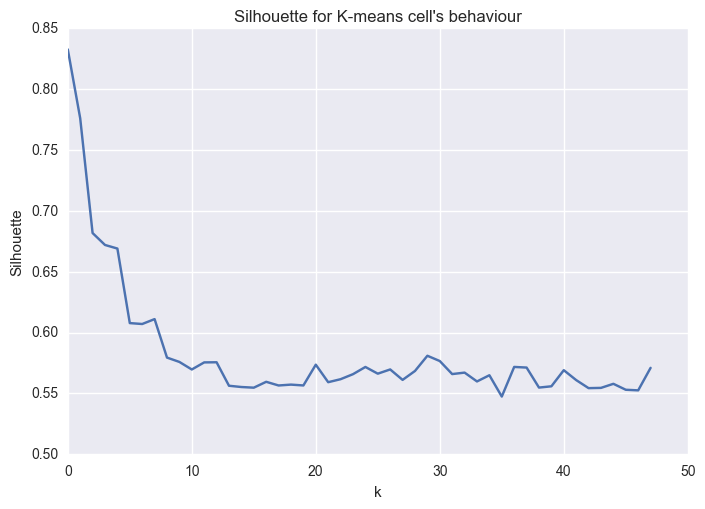

In [50]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt
import seaborn as sns

imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
df1 = imp.fit_transform(df1)

# ncluster = 5 # input

range_n_clusters = range(2,50)

sil_scores = []
for n_cluster in range_n_clusters:
    clusterer = KMeans(n_clusters=n_cluster, random_state = 0).fit(df1)
    cluster_labels = clusterer.fit_predict(df1)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df1, cluster_labels)
    sil_scores.append(silhouette_score(df1, cluster_labels, metric='euclidean'))
    print("For n_clusters =", n_cluster,
          "The average silhouette_score is :", silhouette_avg)
    # print "labels", cluster_labels

plt.plot(sil_scores)
plt.ylabel("Silhouette")
plt.xlabel("k")
plt.title("Silhouette for K-means cell's behaviour")
sns.despine()
plt.show()



Run K-Means with set cluster number 

In [34]:
cluster_num = 5
clusterer5 = KMeans(n_clusters=cluster_num, random_state = 0).fit(df1)
cluster_labels5 = clusterer5.fit_predict(df1)
print "labels", cluster_labels5
print "clusters", clusterer5.cluster_centers_

labels = pandas.DataFrame({'Labels': cluster_labels5})+1
block = df.ix[:,0]
block = block.reset_index(drop=True)

combined = pandas.concat([block, labels], axis=1)
print(combined)


labels [0 4 0 0 2 2 0 4 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2 1 4 1 1 4 1 0 0 0 0 1
 4 2 0 4 2 2 0 2 0 2 2 0 2 2 0 0 0 2 4 1 0 1 0 0 3 4 4 2 0 0 0 2 0 0 4 2 2
 0 2 1 3 1 1 3 2 0 0 0 0 0 0 4 0 0 4 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 3 0 3 4
 1 3 1 3 1 0 0 0 0 0 0 0 4 4 3 4 2 0 0 0 0 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 4 2 0 4 1 2 0 3 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 2 0 0 2 0
 0 0 2 0 0 0 4 3 0 0 2 2 1 3 1 4 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 2
 0 0 4 0 0 0 2 1 2 0 3 0 0 0 0 2 0 0 3 1 4 2 0 4 0 0 0 0 2 0 0 2 0 2 2 0 0
 0 0 0 2 2 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 3 2 4 0 0 0 0
 0 0 0 0 0 0 0 4 2 0 0 0 0 2 0 0 2 3 0 0 0 4 1 2 0 0 0 0 2 0 0 2 0 0 4 2 3
 3 2 0 0 2 3 4 4 0 0 4 4 0 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 2 0 0
 0 0 2 2 0 0 1 2 2 0 0 0 0 0 0 2 2 0 2 0 0 2 0 0 2 0 2 2 0 0 0 2 0 0 0 1 2
 1 0 0 0 0 0 0 2 0 2 0 2 0 0 2 0 0 0 1 1 0 0 0 0 4 1 0 0 0 0 2 0 2 0 2 4 1
 4 0 0 2 0 2 0 0 2 0 2 0 2 0 0 0 0 2 0 0 0 0 2 0 0 2 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 2

Read in X data

In [35]:
xdata = "../clean/block_merge.csv" # input
xframe = pandas.read_csv(xdata)
xframe = xframe[pandas.notnull(xframe['BLOCKGROUPID'])]
xframe = xframe.ix[:, 0:23]
print(xframe)

        BLOCKGROUPID  jobs_idx  schl_idx  households  area_median_income  \
0        10010201001      41.0      68.0       175.0             47317.0   
1        10010201002       2.0      68.0       457.0             47317.0   
2        10010202001      10.0      68.0       452.0             47317.0   
3        10010202002      73.0      68.0       400.0             47317.0   
4        10010203001      15.0      68.0       901.0             47317.0   
5        10010203002      81.0      68.0       239.0             47317.0   
6        10010204001      32.0      68.0       402.0             47317.0   
7        10010204002      25.0      92.0       692.0             47317.0   
8        10010204003      59.0      79.0       343.0             47317.0   
9        10010204004      80.0      79.0       264.0             47317.0   
10       10010205001      82.0      92.0       729.0             47317.0   
11       10010205002      74.0      92.0      2418.0             47317.0   
12       100

In [36]:
# print (xframe['BLOCKGROUPID'].astype(int)/10**10).astype(int)
xdf = xframe.loc[ ((xframe['BLOCKGROUPID'].astype(int)/10**10).astype(int)).isin([36, 11, 25, 38, 9]) ]

In [37]:
xdf = xdf.reset_index(drop=True)
print (xdf['BLOCKGROUPID'])

0         90010101011
1         90010101012
2         90010101013
3         90010101014
4         90010101021
5         90010101022
6         90010101023
7         90010102011
8         90010102012
9         90010102013
10        90010102021
11        90010102022
12        90010102023
13        90010102024
14        90010103001
15        90010103002
16        90010103003
17        90010103004
18        90010103005
19        90010104001
20        90010104002
21        90010104003
22        90010104004
23        90010104005
24        90010104006
25        90010105001
26        90010105002
27        90010105003
28        90010105004
29        90010105005
             ...     
23984    381010112001
23985    381010112002
23986    381010112003
23987    381010113001
23988    381010113002
23989    381010113003
23990    381010113004
23991    381039598001
23992    381039598002
23993    381039600001
23994    381039600002
23995    381039600003
23996    381059534001
23997    381059534002
23998    3

In [38]:
combined = combined.rename(columns={'BLKGRP_ID': 'BLOCKGROUPID'})
combined[['BLOCKGROUPID']] = combined[['BLOCKGROUPID']].apply(pandas.to_numeric)
xdf[['BLOCKGROUPID']] = xdf[['BLOCKGROUPID']].apply(pandas.to_numeric)
new_xdf = pandas.merge(xdf, combined, on='BLOCKGROUPID', how="left")

# replace NaN with 0s for labels
new_xdf['Labels'].fillna(0, inplace=True)
print(new_xdf)

# export to csv
new_xdf.to_csv("../clean/labeled_block.csv")

       BLOCKGROUPID  jobs_idx  schl_idx  households  area_median_income  \
0       90010101011      23.0      55.0       230.0             82614.0   
1       90010101012      66.0      55.0       224.0             82614.0   
2       90010101013      74.0      67.0       550.0             82614.0   
3       90010101014      96.0      67.0       383.0             82614.0   
4       90010101021      46.0      88.0       402.0             82614.0   
5       90010101022      71.0      67.0       517.0             82614.0   
6       90010101023      81.0      67.0       558.0             82614.0   
7       90010102011      38.0      88.0       327.0             82614.0   
8       90010102012      87.0      72.0       305.0             82614.0   
9       90010102013      63.0      88.0       331.0             82614.0   
10      90010102021       6.0      89.0       297.0             82614.0   
11      90010102022      22.0      78.0       753.0             82614.0   
12      90010102023      

# Multiclass Classification

In [56]:
from sklearn.model_selection import train_test_split

# split data in housing and non-housing
X_hashouse = new_xdf[new_xdf['Labels'] != 0]
X_hashouse = X_hashouse.reset_index(drop=True)
X_nohouse = new_xdf[new_xdf['Labels'] == 0]

# get a random sampe of (N housing) number of non housing data points
X_nohousehalf = X_nohouse.sample(n=len(X_hashouse.index), random_state = 0)
X_nohousehalf = X_nohousehalf.reset_index(drop=True)

# separate data not in train test from non housing data
X_excl_nohousing = X_nohouse[~X_nohouse['BLOCKGROUPID'].isin(X_nohousehalf['BLOCKGROUPID'])].dropna(how = 'all')
X_excl_nohousing.to_csv("../clean/block_excl_nohouse")

# concatenate housing and non housing data (50/50 each)
X_half_half = pandas.concat([X_nohousehalf, X_hashouse])
X_half_half.to_csv("../clean/block_half_half.csv")
# print X_half_half

# get y labels
y = X_half_half['Labels']

# impute X data
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
X = imp.fit_transform(X_half_half)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
np.savetxt("half_half_Xtrain.csv", X_train, delimiter=",")
np.savetxt("half_half_Xtest.csv", X_test, delimiter=",")
np.savetxt("half_half_ytrain.csv", y_train, delimiter=",")
np.savetxt("half_half_ytest.csv", y_test, delimiter=",")

In [48]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
 
# Use logistic regress to fit model
searchmod = LogisticRegression(penalty = 'l2', dual=False, tol=0.0001, solver='lbfgs')
# LogisticRegression(dual=False, tol=0.0001, solver='lbfgs')
priors = [10**exp for exp in range(-2, 2, 1)]
params = {'C':priors, 'multi_class': ['ovr', 'multinomial']}

# scale and process data
X_scale_train = preprocessing.scale(X_train) 

search = GridSearchCV(searchmod, param_grid = params, cv = 10, verbose = 3)
search.fit(X_scale_train[:, 1:-1], y_train) # go back


Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV] multi_class=ovr, C=0.01 .........................................
[CV] .......... multi_class=ovr, C=0.01, score=0.674797, total=   0.1s
[CV] multi_class=ovr, C=0.01 .........................................
[CV] .......... multi_class=ovr, C=0.01, score=0.601626, total=   0.0s
[CV] multi_class=ovr, C=0.01 .........................................
[CV] .......... multi_class=ovr, C=0.01, score=0.634146, total=   0.0s
[CV] multi_class=ovr, C=0.01 .........................................
[CV] .......... multi_class=ovr, C=0.01, score=0.626016, total=   0.0s
[CV] multi_class=ovr, C=0.01 .........................................
[CV] .......... multi_class=ovr, C=0.01, score=0.661157, total=   0.0s
[CV] multi_class=ovr, C=0.01 .........................................
[CV] .......... multi_class=ovr, C=0.01, score=0.625000, total=   0.0s
[CV] multi_class=ovr, C=0.01 .........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] .......... multi_class=ovr, C=0.01, score=0.608333, total=   0.0s
[CV] multi_class=ovr, C=0.01 .........................................
[CV] .......... multi_class=ovr, C=0.01, score=0.635593, total=   0.0s
[CV] multi_class=ovr, C=0.01 .........................................
[CV] .......... multi_class=ovr, C=0.01, score=0.567797, total=   0.0s
[CV] multi_class=ovr, C=0.01 .........................................
[CV] .......... multi_class=ovr, C=0.01, score=0.589744, total=   0.0s
[CV] multi_class=multinomial, C=0.01 .................................
[CV] .. multi_class=multinomial, C=0.01, score=0.699187, total=   0.0s
[CV] multi_class=multinomial, C=0.01 .................................
[CV] .. multi_class=multinomial, C=0.01, score=0.658537, total=   0.0s
[CV] multi_class=multinomial, C=0.01 .................................
[CV] .. multi_class=multinomial, C=0.01, score=0.658537, total=   0.0s
[CV] multi_class=multinomial, C=0.01 .................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    5.7s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'multi_class': ['ovr', 'multinomial'], 'C': [0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=3)

In [49]:
# predict using fitted estimate
# scale and process data
X_scale_test = preprocessing.scale(X_test) 

ypred = pandas.DataFrame({'pred_log': pandas.Series(search.predict(X_scale_test[:,1:-1]))})
x_test_df = pandas.DataFrame(X_test)
test_final = pandas.concat([x_test_df, ypred], axis=1)
test_final.to_csv("../clean/pred_block.csv")

# Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier
 
# Use random forest to fit model
search_modrf = sklearn.ensemble.RandomForestClassifier(criterion='gini', max_depth=None, random_state = 0)
n_estimate = range(5:15)
params = {'n_estimators':n_estimate, 'max_features': ['auto', 'log2', None]}

search_rf = GridSearchCV(search_modrf, param_grid = params, cv = 10, verbose = 3)
search_rf.fit(X_scale_train[:, 1:-1], y_train) # go back


In [ ]:
# predict using fitted estimate
# scale and process data

ypred_rf = pandas.DataFrame({'pred_log': pandas.Series(search.predict(X_scale_test[:,1:-1]))})
x_test_df = pandas.DataFrame(X_test)
test_final_rf = pandas.concat([x_test_df, ypred_rf], axis=1)
test_final_rf.to_csv("../clean/rf_pred_block.csv")